## K-평균

군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

### K-평균 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
#3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [4]:
#실제 품종 분류 값과 얼마나 차이가 나는지 확인
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
irisDF.groupby(['target', 'cluster']).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

In [6]:
#4개 속성을 PCA를 이용해 2개로 차원 축소한 뒤에 2차원 평면상에 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


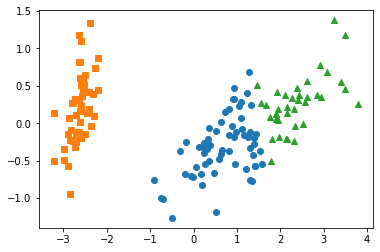

In [7]:
#군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값이 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출, o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

### 군집화 알고리즘 테스트를 위한 데이터 생성

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#200개 레코드와 2개 피처가 3개의 군집화 기본 분포도를 가진 피처 데이터 세트 X / 3개의 군집화 값을 가진 타깃 데이터 세트 y 반환
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


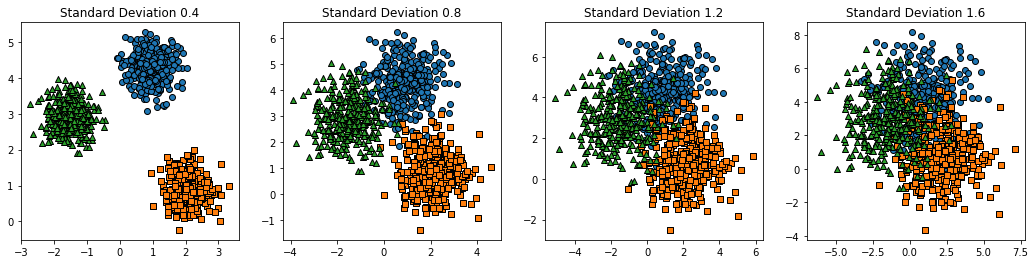

In [20]:
#make_blobs()의 cluster_std 파라미터
#cluster_std가 작을수록 군집 중심에 데이터가 모여있으며, 클수록 데이터가 퍼져 있음

fig, axs = plt.subplots(figsize=(18,4), nrows=1, ncols=4)

for i, std in enumerate([0.4, 0.8, 1.2, 1.6]):
    X, y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=std, random_state=0)
    clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    clusterDF['target'] = y
    target_list = np.unique(y)
    markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target']==target]
        axs[i].set_title('Standard Deviation '+str(std))
        axs[i].scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

In [9]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


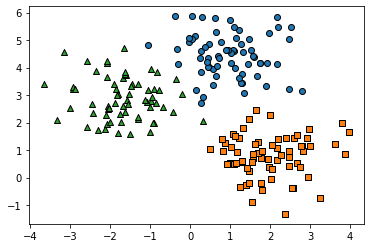

In [10]:
target_list = np.unique(y)
#각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
#target == 0, target == 1, target == 2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

In [11]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
clusterDF.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


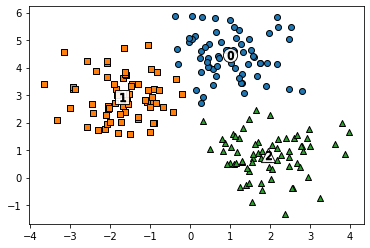

In [12]:
#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [13]:
#make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음 --> 그래서 산점도의 마커가 다를 수 있음
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


Target 0 이 cluster label 0 으로, Target 1 이 cluster label 2 로, Target 2 가 cluster label 1 로 거의 대부분 잘 매핑됨

## 군집 평가(Cluster Evaluation)

### 실루엣 분석(silhouette analysis)

**각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타내는 실루엣 분석(silhouette analysis)**

In [24]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터의 실루엣 계수 값 구하기
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( )의 return 값의 shape:', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값 구하기
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head()

silhouette_samples( )의 return 값의 shape: (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [25]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

개별 군집 별로 적당히 분리된 거리 유지하면서도 군집 내의 데이터가 뭉쳐있는 경우에 적절한 군집화 개수가 설정됐다고 판단

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [26]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

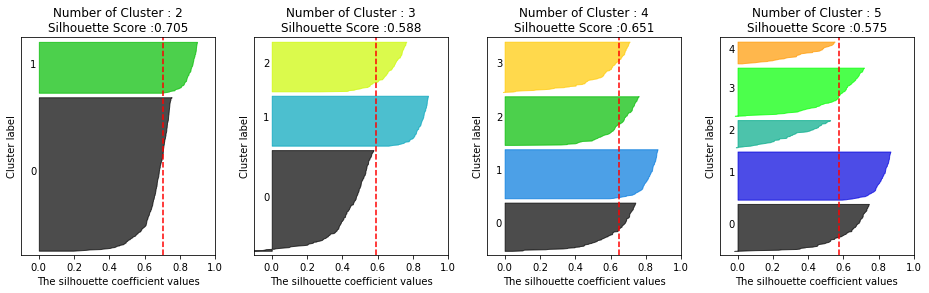

In [27]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

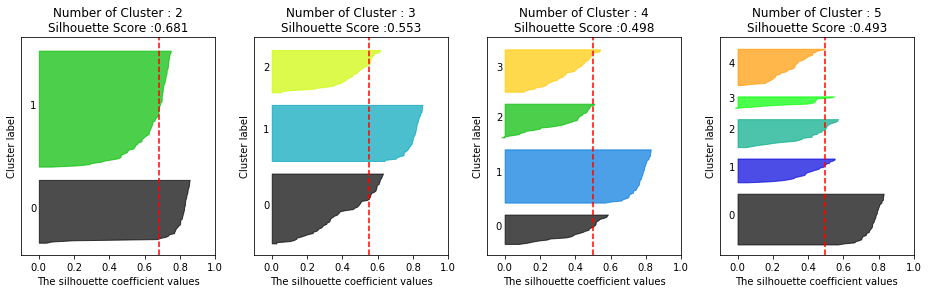

In [28]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

## 평균 이동(Mean Shift)

군집의 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동, 확률 밀도 함수 찾기 위해 KDE 이용하며 대역폭의 크기에 따라 군집화 수행

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\Users\hyomi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hyomi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

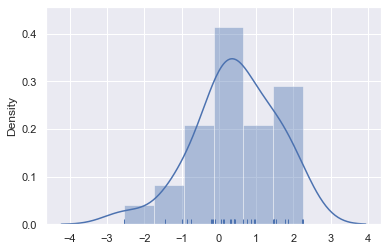

In [10]:
#seaborn 이용하여 kde 시각화
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x, rug=True, hist=True, kde=True)

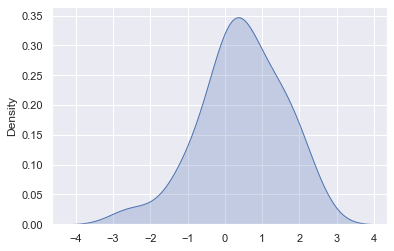

In [11]:
sns.kdeplot(x, shade=True);

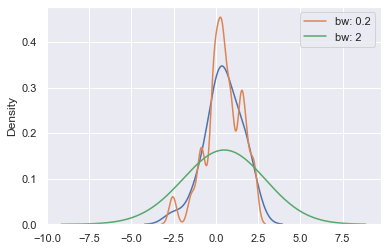

In [21]:
#bandwidth에 따른 KDE 변화
sns.kdeplot(x)
sns.kdeplot(x, bw_method=0.2, label="bw: 0.2")
sns.kdeplot(x, bw_method=2, label="bw: 2")
plt.legend();

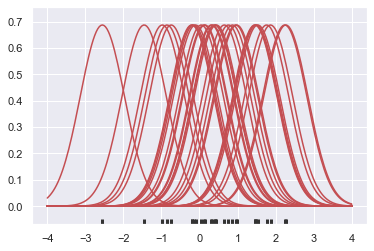

In [13]:
#개별 관측 데이터에 가우시안 커널 함수 적용
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

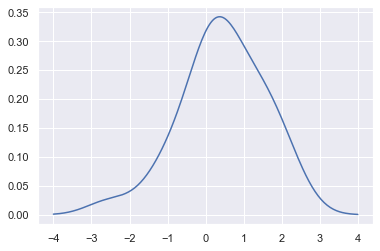

In [14]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

**3개의 군집 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 적용 예제**

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
#bandwidth 작게할수록 군집 개수 많아짐
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [4]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


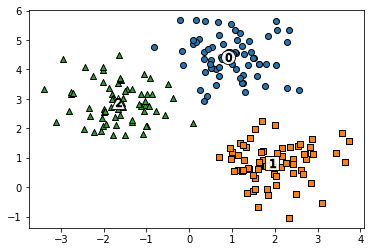

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [8]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않아서 좀 더 유연한 군집화 가능, 이상치의 영향력 크지 않고 군집 개수 정할 필요 없음

but, 수행시간 오래 걸리고 bandwidth 크기에 따른 군집화 영향도가 매우 큼

## GMM(Gaussian Mixture Model)

전체 데이터 세트가 여러 개의 가우시안 분포가 섞인 것으로 간주하고 군집화 수행, **확률 기반** 군집화

In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

#target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)
irisDF.head()

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)
irisDF.head()

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster,kmeans_cluster
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


붓꽃 데이터 세트는 GMM 군집화에 더 효과적

### GMM과 K-평균의 비교

In [33]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

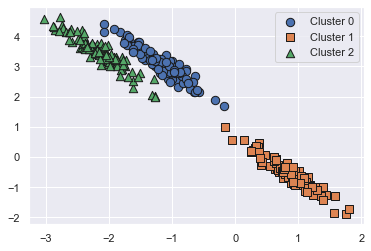

In [34]:
#GMM군집화와 K-Means군집화를 비교하기 위해 타원형으로 늘어선 임의의 데이터 세트를 생성
from sklearn.datasets import make_blobs

#make_blobs로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

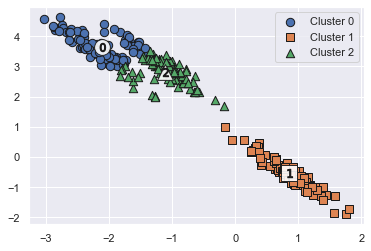

In [35]:
#3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

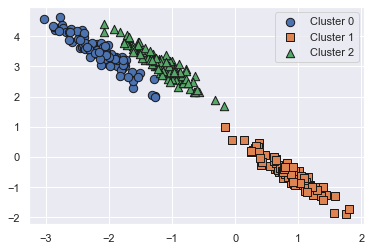

In [36]:
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#GaussianMixture은 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [37]:
clusterDF.head()

,ftr1,ftr2,target,kmeans_label,gmm_label
0,-1.671828,3.814284,0,0,2
1,0.945385,-0.901944,1,1,1
2,-0.959199,2.857152,0,2,2
3,-2.187799,3.569903,2,0,0
4,-1.967100,3.067528,2,0,0


In [38]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있지만 수행 시간이 오래걸림

## DBSCAN(Density Based Spatial Clustering of Applications with Noise)

특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 함  
입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족 시키는 데이터인 핵심 포인트를 연결하면서 군집화 구성

&rarr; 입실론 주변 영역(eps), 최소 데이터 개수(min_samples)  
&rarr; Core Point, Neighbor Point, Border Point, Noise Point

In [39]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [40]:
from sklearn.cluster import DBSCAN

#일반적으로 eps는 1 이하의 값으로 설정
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
irisDF.head()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


군집 레이블이 -1인 것은 노이즈에 속하는 군집

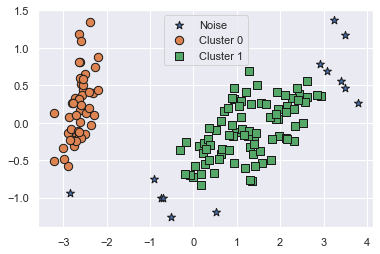

In [41]:
from sklearn.decomposition import PCA
#2차원으로 시각화하기위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
#visualize_cluster_plot()함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

DBSCAN을 적용할 때는 특정 군집 개수 강제하지 않는 것이 좋으며 eps, min_samples 파라미터 조정하여 최적의 군집 찾는게 중요

eps 크게하면 반경이 커져 노이즈 데이터 개수 작아짐, min_samples 크게하면 주어진 반경 내에 더 많은 데이터 포함시켜야 하므로 노이즈 데이터 개수 커짐

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


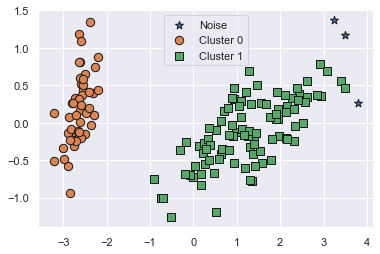

In [42]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


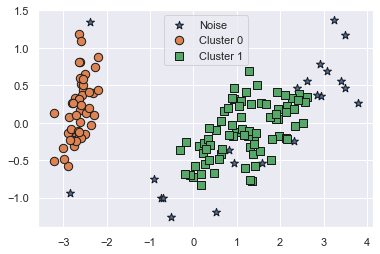

In [43]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트

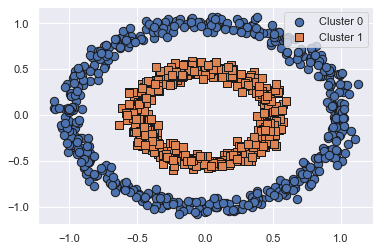

In [45]:
#make_circles()함수를 이용해 내부 원과 외부 원 형태로 되어 있는 2차원 데이터 세트 만들기
#noise: 노이즈 데이터 세트의 비율, factor: 외부 원과 내부 원의 scale 비율

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [46]:
clusterDF.head()

,ftr1,ftr2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


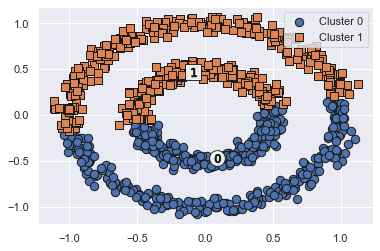

In [47]:
#KMeans로 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

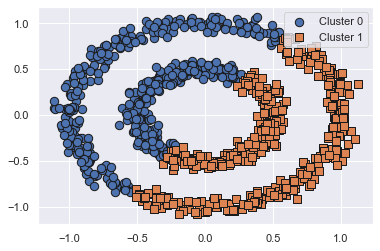

In [48]:
#GMM으로 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

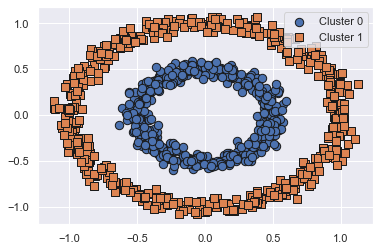

In [49]:
#DBSCAN으로 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)